## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd
import ast                      # convert string to list after importing csv data
import pickle

# Libraries to cluster data
from sklearn.cluster import KMeans

# Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from cluster_visualization_helper import (
    visualize_cluster)  # user-defined functions

# Libraries for evaluation
from sklearn import metrics

# Libraries for monitoring operation process
from datetime import datetime
from tqdm import tqdm

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':  
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

SEED = 6886
%matplotlib inline

## Import data

In [3]:
skill_embeddings = np.load(OUTPUT_DIR + "skill_feat_embeddings.npy")
skill_embeddings.shape

(361584, 600)

In [4]:
skill_docs = pd.read_csv(
    OUTPUT_DIR + "skill_tokens_long_df.csv",
    converters={
        "skill_description_tokens": ast.literal_eval,
        "skill_requirement_tokens": ast.literal_eval,
        "skill_qualification_tokens": ast.literal_eval
    },
    dtype={
        "skill_id": int,
        "job_id": int,
        "job_description": str,
        "job_requirement": str,
        "job_qualification": str
    }
)
skill_docs.shape

(361584, 8)

In [5]:
skill_docs.iloc[:5, ]

,skill_id,job_id,job_description,skill_description_tokens,job_requirement,skill_requirement_tokens,job_qualification,skill_qualification_tokens
0,1,1,ameria investment consulting company,"[ameria, investment, consulting, company]",liquidity reserves assists investment team,"[liquidity, reserves, assists, investment, team]",providing job performance feedback,"[providing, job, performance, feedback]"
1,2,1,provides highly responsible,"[provides, highly, responsible]",incorporation regarding corporate registration,"[incorporation, regarding, corporate, registra...",operate specialized software applications,"[operate, specialized, software, applications]"
2,3,1,complex staff assistance,"[complex, staff, assistance]",including evaluating loss exposure,"[including, evaluating, loss, exposure]",state reporting requirements pertaining,"[state, reporting, requirements, pertaining]"
3,4,1,chief financial officer,"[chief, financial, officer]",internal financial management reports,"[internal, financial, management, reports]",generally accepted accounting principles,"[generally, accepted, accounting, principles]"
4,5,1,investment management,"[investment, management]",investment team leader,"[investment, team, leader]",accounting technical skills coupled,"[accounting, technical, skills, coupled]"


## Clustering data

### K-means

In [6]:
def kmeans_clusterer(X, k, seed=SEED):
    """Generate clusters and print Silhouette metrics using Kmeans

    Args:
        X: Matrix of features
        k: Number of clusters
        seed: Seed number to ensure reproducibility

    Returns:
        Trained clustering model based on X.
    """

    km = KMeans(n_clusters=k, random_state=seed).fit(X)

    return km

In [12]:
# Define search space for tuning hyperparameters
X = skill_embeddings
model_list = []
duration_list = []
# k_range = list(range(2, 301))
k_range = list(range(5, 25, 5))
k_range.extend(list(range(25, 110, 25)))
k_range.extend([150, 200])
len(k_range), k_range

(10, [5, 10, 15, 20, 25, 50, 75, 100, 150, 200])

In [13]:
# Tuning hyperparameter
start_loop_time = datetime.now()
print('Start loop', start_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))

for k in tqdm(k_range):
    starttime = datetime.now()
    print('Start', starttime.strftime('%Y-%m-%d %H:%M:%S.%f'))

    clusterer = kmeans_clusterer(
        X=skill_embeddings,
        k=k,
        seed=SEED
    )
    endtime = datetime.now()
    print('End', endtime.strftime('%Y-%m-%d %H:%M:%S.%f'))
    print('Duration', endtime - starttime)

    model_list.append(clusterer)
    duration_list.append(round((endtime - starttime).seconds/60, 2))

end_loop_time = datetime.now()
print('End loop', end_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))
print('Duration', end_loop_time - start_loop_time)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Start loop 2021-05-03 15:22:03.268962
Start 2021-05-03 15:22:03.288692


 10%|████████▎                                                                          | 1/10 [01:33<14:03, 93.74s/it]

End 2021-05-03 15:23:37.013047
Duration 0:01:33.724355
Start 2021-05-03 15:23:37.068945


 20%|████████████████▍                                                                 | 2/10 [04:11<17:32, 131.62s/it]

End 2021-05-03 15:26:15.164547
Duration 0:02:38.095602
Start 2021-05-03 15:26:15.164547


 30%|████████████████████████▌                                                         | 3/10 [07:37<19:16, 165.27s/it]

End 2021-05-03 15:29:40.457578
Duration 0:03:25.293031
Start 2021-05-03 15:29:40.473192


 40%|████████████████████████████████▊                                                 | 4/10 [12:06<20:37, 206.19s/it]

End 2021-05-03 15:34:09.392066
Duration 0:04:28.918874
Start 2021-05-03 15:34:09.407685


 50%|█████████████████████████████████████████                                         | 5/10 [17:33<20:49, 249.99s/it]

End 2021-05-03 15:39:37.048354
Duration 0:05:27.640669
Start 2021-05-03 15:39:37.048354


 60%|█████████████████████████████████████████████████▏                                | 6/10 [27:16<24:12, 363.16s/it]

End 2021-05-03 15:49:19.904433
Duration 0:09:42.856079
Start 2021-05-03 15:49:19.920058


 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [42:27<27:06, 542.30s/it]

End 2021-05-03 16:04:31.001477
Duration 0:15:11.081419
Start 2021-05-03 16:04:31.001477


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [58:50<22:45, 682.62s/it]

End 2021-05-03 16:20:54.083404
Duration 0:16:23.081927
Start 2021-05-03 16:20:54.083404


 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [1:21:27<14:53, 893.24s/it]

End 2021-05-03 16:43:30.421453
Duration 0:22:36.338049
Start 2021-05-03 16:43:30.423453


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:51:32<00:00, 669.22s/it]

End 2021-05-03 17:13:35.521597
Duration 0:30:05.098144
End loop 2021-05-03 17:13:35.580187
Duration 1:51:32.311225


## Evaluate cluster performance

In [14]:
# Calculate evaluation metrics
calhar_scores = []
davbou_scores = []
silho_scores = []
sum_of_squared_distances = []
label_list = []

for i in tqdm(range(len(model_list))):
    model = model_list[i]
    cluster_labels = model.labels_
    k = k_range[i]

    # Compute Intertia
    inertia = model.inertia_
#     print("Inertia =", inertia)

    # Compute Calinski Harabasz Score
    """
    The score is defined as ratio between the within-cluster dispersion and
    the between-cluster dispersion.
    """
    try:
        ch_score = metrics.calinski_harabasz_score(X, cluster_labels)
#         print("Calinski Harabasz Score =", ch_score)
    except Exception as error:
        ch_score = -2
        print("k =", k)
        print(
            f"Error in calculating Calinski Harabasz Score: {error}"
        )

    # Compute Davies-Bouldin Score
    """
    The score is defined as the average similarity measure of each cluster with
    its most similar cluster, where similarity is the ratio of within-cluster
    distances to between-cluster distances. Thus, clusters which are farther
    apart and less dispersed will result in a better score.
    The minimum score is zero, with lower values indicating better clustering.
    """
    try:
        db_score = metrics.davies_bouldin_score(X, cluster_labels)
#         print("Davies-Bouldin Score =", db_score)
    except Exception as error:
        db_score = -2
        print("k =", k)
        print(f"Error in calculating Davies-Bouldin Score: {error}")

    # Compute Silhouette Score
    """
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indicate that a sample has
    been assigned to the wrong cluster, as a different cluster is more similar.
    """
    try:
        silhouette_score = metrics.silhouette_score(
            X, cluster_labels, random_state=SEED, sample_size=20000, n_jobs=-1
        )
#         print("Silhouette Score =", silhouette_score)
    except Exception as error:
        silhouette_score = -2
        print("k =", k)
        print(f"Error in calculating Silhouette Score: {error}")

    sum_of_squared_distances.append(inertia)
    silho_scores.append(silhouette_score)
    calhar_scores.append(ch_score)
    davbou_scores.append(db_score)
    label_list.append(cluster_labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:14<00:00, 19.48s/it]


In [15]:
# Combine model sets
tuple_objects = (
    k_range,
    model_list,
    duration_list,
    label_list,
    sum_of_squared_distances,
    silho_scores,
    calhar_scores,
    davbou_scores,
)
len(tuple_objects), len(tuple_objects[0])

(8, 10)

In [16]:
# Save tuple
pickle.dump(tuple_objects, open(OUTPUT_DIR + "skills_kmeans_model_list.pkl", "wb"))

In [ ]:
# # Load pickle
# (
#     k_range,
#     model_list,
#     duration_list,
#     label_list,
#     sum_of_squared_distances,
#     silho_scores,
#     calhar_scores,
#     davbou_scores,
# ) = pickle.load(open(OUTPUT_DIR + "skills_kmeans_model_list.pkl", "rb"))

#### Inertia

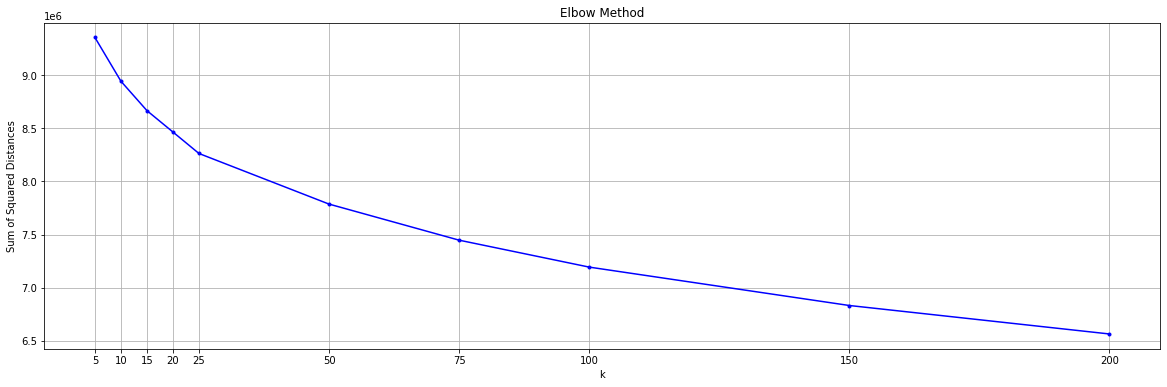

In [17]:
# Sudden change in slope suggests optimal number of clusters
plt.figure(figsize=(20, 6))
plt.plot(k_range, sum_of_squared_distances, "b.-")
plt.xlabel("k")
plt.xticks(k_range)
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.grid()
plt.show()

#### Silhoulette score

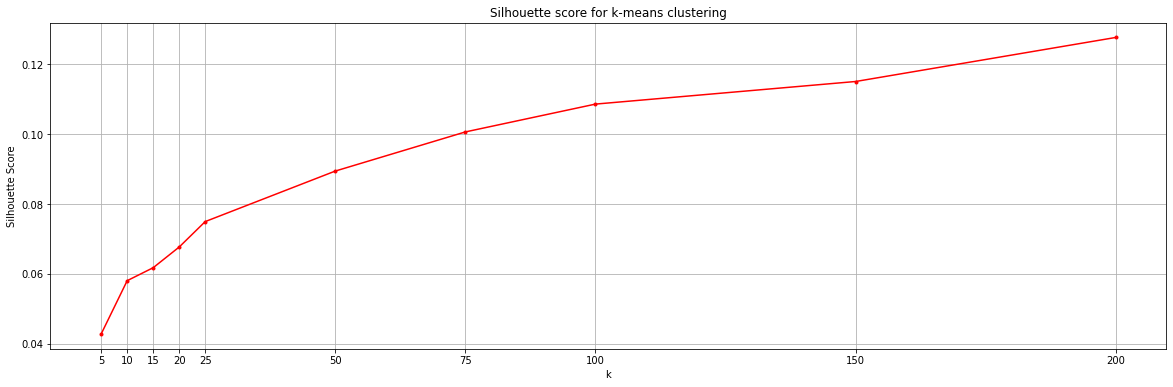

In [18]:
# The best is 1 and the worst is -1. Values near 0 indicate overlapping
plt.figure(figsize=(20, 6))
plt.plot(k_range, silho_scores, "r.-")
plt.xlabel("k")
plt.xticks(k_range)
plt.ylabel("Silhouette Score")
plt.title("Silhouette score for k-means clustering")
plt.grid()
plt.show()

#### Calinski Harabasz Score

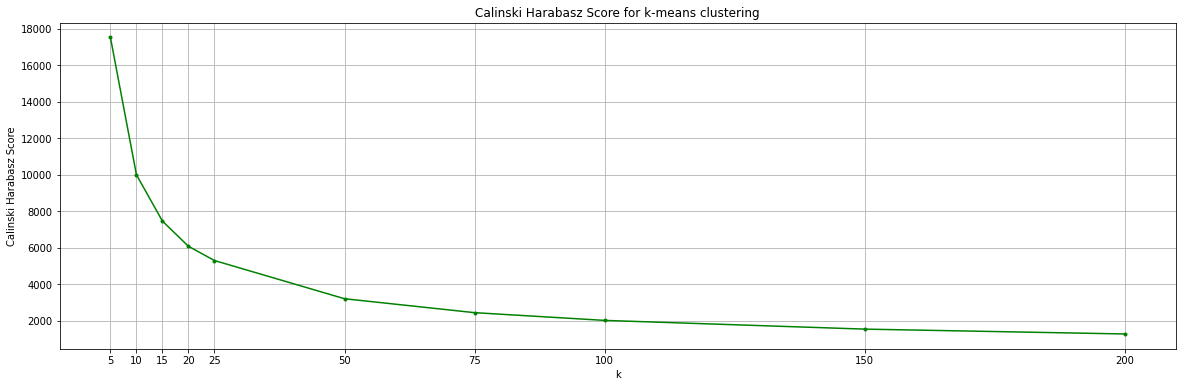

In [19]:
# Ratio between the within-cluster dispersion and the between-cluster dispersion
fig = plt.figure(figsize=(20, 6))
ax = plt.subplot()
plt.plot(k_range, calhar_scores, "g.-")
plt.xlabel("k")
plt.xticks(k_range)
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Score for k-means clustering")
plt.grid()
plt.show()

#### Davies-Bouldin Score

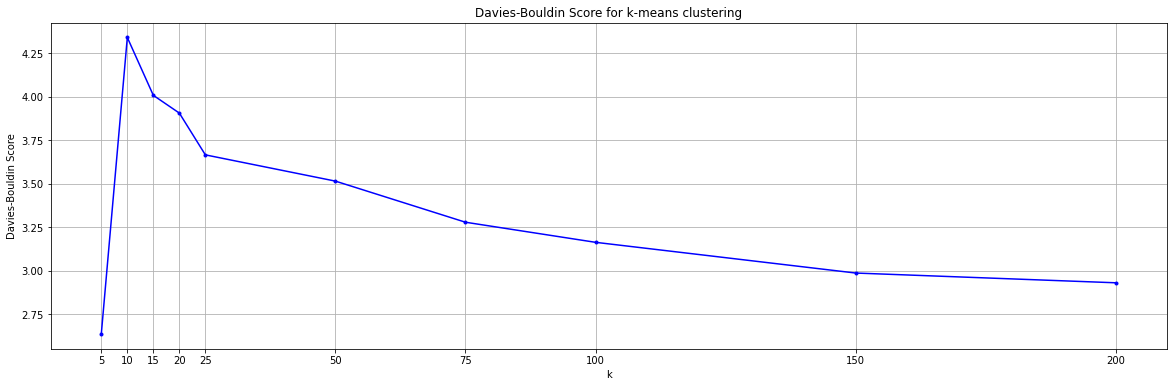

In [20]:
# Clusters which are farther apart and less dispersed result in a better score.
# The minimum score is zero, with lower values indicating better clustering
fig = plt.figure(figsize=(20, 6))
ax = plt.subplot()
plt.plot(k_range, davbou_scores, "b.-")
plt.xlabel("k")
plt.xticks(k_range)
plt.ylabel("Davies-Bouldin Score")
plt.title("Davies-Bouldin Score for k-means clustering")
plt.grid()
plt.show()

## Save cluster results to file

In [21]:
# Select the optimal number of clusters
best_index = np.argmax(silho_scores)
# best_index = int(np.where(np.asarray(k_range) == 100)[0])
print(best_index)

best_k = k_range[best_index]
print(f'Optimal k = {best_k}')

best_labels = label_list[best_index]

9
Optimal k = 200


In [22]:
# Create text and token columns
skill_docs["feature_skills_tokens"] = (
    skill_docs["skill_description_tokens"] + skill_docs["skill_requirement_tokens"]
)

skill_docs["feature_skills"] = (
    skill_docs["job_description"] + skill_docs["job_requirement"]
)

In [23]:
df_clusters = skill_docs[["skill_id", "job_id", "feature_skills", "feature_skills_tokens"]]
df_clusters["model_type"] = "kmeans"
df_clusters["number_clusters"] = best_k
df_clusters["skill_cluster"] = best_labels

<ipython-input-23-dcd6c302a985>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters["model_type"] = "kmeans"
<ipython-input-23-dcd6c302a985>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters["number_clusters"] = best_k
<ipython-input-23-dcd6c302a985>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [24]:
df_clusters

,skill_id,job_id,feature_skills,feature_skills_tokens,model_type,number_clusters,skill_cluster
0,1,1,ameria investment consulting companyliquidity ...,"[ameria, investment, consulting, company, liqu...",kmeans,200,131
1,2,1,provides highly responsibleincorporation regar...,"[provides, highly, responsible, incorporation,...",kmeans,200,80
2,3,1,complex staff assistanceincluding evaluating l...,"[complex, staff, assistance, including, evalua...",kmeans,200,92
3,4,1,chief financial officerinternal financial mana...,"[chief, financial, officer, internal, financia...",kmeans,200,31
4,5,1,investment managementinvestment team leader,"[investment, management, investment, team, lea...",kmeans,200,143
...,...,...,...,...,...,...,...
361579,16,18993,NaN,"[unprovided, unprovided]",kmeans,200,1
361580,17,18993,NaN,"[unprovided, unprovided]",kmeans,200,1
361581,18,18993,NaN,"[unprovided, unprovided]",kmeans,200,1
361582,19,18993,NaN,"[unprovided, unprovided]",kmeans,200,1


In [25]:
df_clusters.to_csv(OUTPUT_DIR + "job-skill-clusters_wide_kmeans.csv", index=False)

## Visualize clusters

In [27]:
pca_datapoint = np.load(OUTPUT_DIR + "/visualization/" + "skills_wide_pca_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "/visualization/" + "skills_wide_tsne_datapoints.npy")

In [7]:
# best_model_df = pd.read_csv(
#     OUTPUT_DIR + "job-skill-clusters_wide_kmeans.csv",
#     usecols=["skill_cluster", "number_clusters"],
# )

In [19]:
# best_k = int(best_model_df.loc[0, ['number_clusters']])
# best_labels = best_model_df['skill_cluster'].values
# best_k, len(best_labels)

(100, 361584)

Start PCA 2021-05-03 17:54:56.079544
End PCA 2021-05-03 17:54:56.149548
PCA duration 0:00:00.070004

Start t-SNE 2021-05-03 17:54:56.150542
End t-SNE 2021-05-03 17:54:56.210030
t-SNE duration 0:00:00.059488



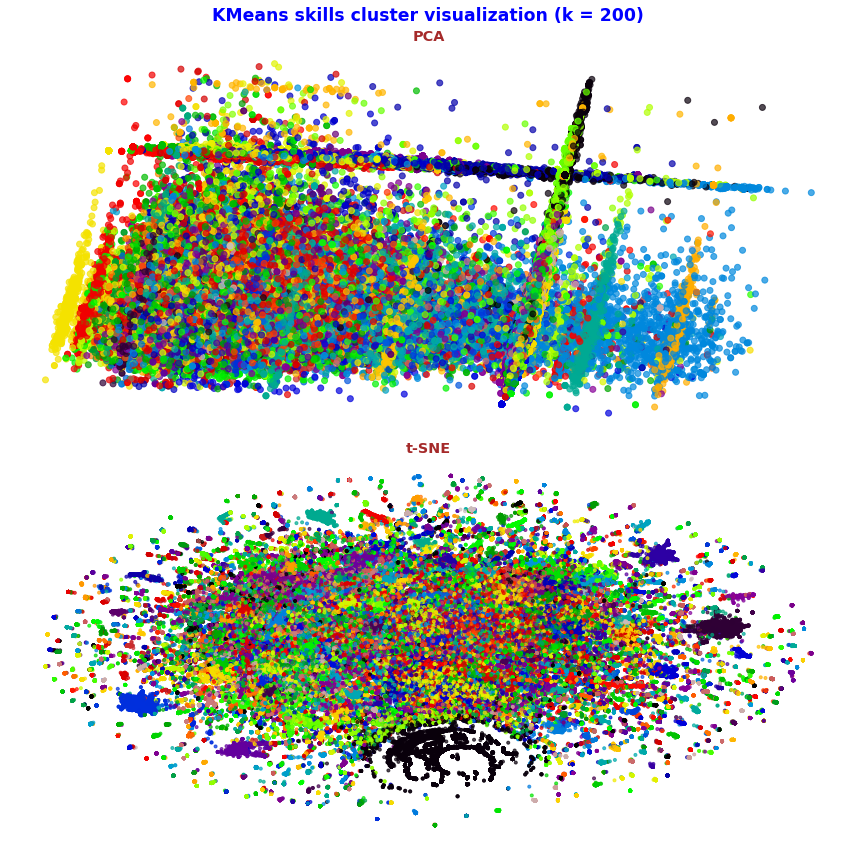

In [28]:
plot_skill = f"KMeans skills cluster visualization (k = {best_k})"
palette = sns.color_palette("hls", as_cmap=True)
colors = cm.nipy_spectral(best_labels.astype(float) / best_k)

# Visualize clusters with PCA and t-SNE
visualize_cluster(
    plot_skill,
    (12, 12),
    colors,
    palette,
    pca_datapoint,
    tsne_datapoint,
    None,
    pca=True,
    tsne=True,
    mds=False
)